In [ ]:
# List all NVIDIA GPUs as avaialble in this computer (or Colab's session)
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ba7c524d-2ca8-e2c5-d521-13cd1ed873cb)


# Import pic

In [1]:
# Load Data from Google Drive
from google.colab import drive
import os
drive.mount('/content/drive')
# data= pd.read_csv('/content/drive/MyDrive/DAD7202/hotel_bookings.csv')

Mounted at /content/drive


In [2]:
import cv2

In [3]:
os.listdir('/content/drive/MyDrive/RCNN/')

['Yolov5.ipynb',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg',
 'test8.jpg',
 'test7.jpg',
 'test9.jpg',
 'scottish_fold',
 'exotic_shorthair',
 'british_shorthair',
 'american_shorthair',
 'resnet50v2.ipynb']

In [4]:
label_class = {'exotic_shorthair':0,'scottish_fold':1 ,'american_shorthair':2,'british_shorthair':3}

In [5]:
list(label_class.keys())

['exotic_shorthair',
 'scottish_fold',
 'american_shorthair',
 'british_shorthair']

In [6]:
from sklearn.model_selection import train_test_split
x_train = []
x_test =[]
x_val = []

y_train = []
y_test = []
y_val = []

img_size = (224,224)

for c in list(label_class.keys()):
  filename = [i for i in os.listdir('/content/drive/MyDrive/RCNN/{0}'.format(c)) if 'jpg' in i]
  train_index, val_index, = train_test_split(filename, test_size = 0.2, random_state = 1)
  val_index, test_index, = train_test_split(val_index, test_size = 0.5, random_state = 1)

  for i in train_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    # print('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_train.append(img)
    y_train.append([label_class[c]])

  for i in val_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_val.append(img)
    y_val.append([label_class[c]])

  for i in test_index:
    img = cv2.imread('/content/drive/MyDrive/RCNN/{0}/{1}'.format(c,i))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,img_size)
    x_test.append(img)
    y_test.append([label_class[c]])

In [7]:
len(x_train)+len(x_test)+len(x_val)

775

# Random train test

In [8]:
import random


random.seed(0)
train_index = [i for i in range(len(x_train))]
test_index = [i for i in range(len(x_test))]

random.shuffle(train_index)
random.shuffle(test_index)

x_train = [x_train[i] for i in train_index]
y_train = [y_train[i] for i in train_index]

x_test = [x_test[i] for i in test_index]
y_test = [y_test[i] for i in test_index]

In [9]:
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]

NumPy 1.21.6

TensorFlow 2.9.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


# Seed

In [10]:
np.random.seed(1234)
# tf.random.set_seed(5678)

In [11]:
# np.random.seed(1357) 
# tf.random.set_seed(8753)

In [12]:
# np.random.seed(1928)  
# tf.random.set_seed(1947)

In [13]:
tf.random.set_seed(2012)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
img_height = 224
img_width = 224
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.3,value_range=(0, 255), seed=64),
  ]
)

# Augment

In [16]:
aug_x_train = []
aug_y_train = []

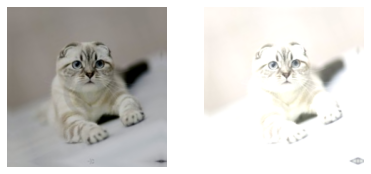

In [17]:
images =  np.array(x_train)

plt.figure(figsize=(10, 10))
for i in range(2):
  ax = plt.subplot(3, 3, i + 1)
  augmented_images = data_augmentation(images)
  plt.imshow(augmented_images[0].numpy().astype("uint8") )
  plt.axis('off')
  for index,i in enumerate(augmented_images):
    aug_x_train.append(i.numpy().astype("uint8"))
    aug_y_train.append(y_train[index])
    

american_shorthair


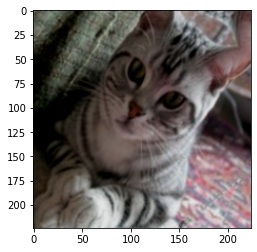

In [18]:
print(list(label_class.keys())[aug_y_train[1001][0]])
plt.imshow(aug_x_train[1001])


In [19]:
for index,i in enumerate(x_train):
  
  seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
  img = tf.image.stateless_random_hue(i, 0.5, seed).numpy().astype("uint8")
  aug_x_train.append(img)
  aug_y_train.append(y_train[index])

In [20]:
len(aug_x_train)

1860

In [21]:
y_train.count([0])

164

In [22]:
y_train.count([1])

156

In [23]:
y_train.count([2])

152

In [24]:
y_train.count([3])

148

In [25]:
len(y_train)

620

In [26]:
aug_y_train.count([0])

492

In [27]:
aug_y_train.count([1])

468

In [28]:
aug_y_train.count([2])

456

In [29]:
aug_y_train.count([3])

444

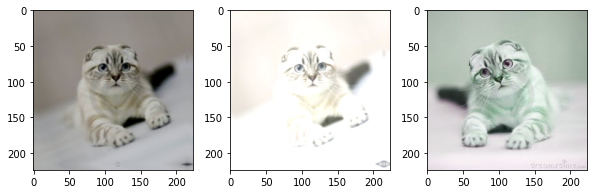

In [30]:

plt.figure(figsize=(10, 10))




ax = plt.subplot(3, 3, 1)
plt.imshow(aug_x_train[0])

ax = plt.subplot(3, 3, 2)
plt.imshow(aug_x_train[620])

ax = plt.subplot(3, 3, 3)
plt.imshow(aug_x_train[1240])

In [31]:

# plt.figure(figsize=(10, 10))




# ax = plt.subplot(3, 3, 1)
# plt.imshow(x_train[0])

# ax = plt.subplot(3, 3, 2)
# plt.imshow(augmented_images[0].numpy().astype("uint8"))

# ax = plt.subplot(3, 3, 3)
# seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
# plt.imshow(tf.image.stateless_random_hue(x_train[0], 0.5, seed).numpy().astype("uint8"))

In [32]:
import tensorflow as tf
x_train_res = tf.keras.applications.resnet_v2.preprocess_input(np.array(aug_x_train))
x_test_res = tf.keras.applications.resnet_v2.preprocess_input(np.array(x_test))

print( x_train_res.dtype, x_train_res.shape, np.min(x_train_res), np.max(x_train_res) )
print( x_test_res.dtype, x_test_res.shape, np.min(x_test_res), np.max(x_test_res) )

float32 (1860, 224, 224, 3) -1.0 1.0
float32 (79, 224, 224, 3) -1.0 1.0


# Model

In [40]:
# Load the ImageNet VGG-16 model, ***excluding*** the latter part regarding the classifier
# Default of input_shape is 224x224x3 for VGG-16
img_w,img_h = 32,32     # image size of CIFAR-10
resnet_extractor = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))

resnet_extractor.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

# Fine tune

In [41]:
resnet_extractor.trainable = False

# for i,layer in enumerate(resnet_extractor.layers[179:]):  
#     layer.trainable = True

In [42]:
# Recursively freeze all layers in the model


for i,layer in enumerate(resnet_extractor.layers):  
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_2 , trainable = False
Layer 1: name = conv1_pad , trainable = False
Layer 2: name = conv1_conv , trainable = False
Layer 3: name = pool1_pad , trainable = False
Layer 4: name = pool1_pool , trainable = False
Layer 5: name = conv2_block1_preact_bn , trainable = False
Layer 6: name = conv2_block1_preact_relu , trainable = False
Layer 7: name = conv2_block1_1_conv , trainable = False
Layer 8: name = conv2_block1_1_bn , trainable = False
Layer 9: name = conv2_block1_1_relu , trainable = False
Layer 10: name = conv2_block1_2_pad , trainable = False
Layer 11: name = conv2_block1_2_conv , trainable = False
Layer 12: name = conv2_block1_2_bn , trainable = False
Layer 13: name = conv2_block1_2_relu , trainable = False
Layer 14: name = conv2_block1_0_conv , trainable = False
Layer 15: name = conv2_block1_3_conv , trainable = False
Layer 16: name = conv2_block1_out , trainable = False
Layer 17: name = conv2_block2_preact_bn , trainable = False
Layer 18: name = conv2_block2_p

In [43]:
x = resnet_extractor.output

# Add our custom layer(s) to the end of the existing model 
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)##[256,512,1024]
x = tf.keras.layers.Dropout(0.5)(x)##[0.5,0.75]
new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x) 

# Construct the main model 
model = tf.keras.models.Model(inputs=resnet_extractor.inputs, outputs=new_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# base_model = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
# preprocess_input = tf.keras.applications.resnet_v2.preprocess_input
# prediction_layer = tf.keras.layers.Dense(4)

In [ ]:
# inputs = tf.keras.Input(shape=(224, 224, 3))
# x = data_augmentation(inputs)
# # x = preprocess_input(x)
# x = base_model(x, training=False)
# # x = global_average_layer(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(512, activation="relu")(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# model = tf.keras.Model(inputs, new_outputs)
# model.summary()

In [ ]:
model.compile( loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,name='Adam'), metrics=["acc"] )

In [ ]:
checkpoint_filepath = "bestmodel_epoch.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                              save_weights_only=True,
                                                                                              monitor='val_acc',
                                                                                              mode='max',
                                                                                              save_best_only=True)

In [ ]:
%%time
history = model.fit( x_train_res, np.array(aug_y_train), batch_size=256, epochs=50, verbose=1,validation_data=(x_test_res, np.array(y_test)), callbacks=[model_checkpoint_callback])

Epoch 1/50
8/8 [==============================] - 24s 2s/step - loss: 2.5361 - acc: 0.5565 - val_loss: 1.0625 - val_acc: 0.8101
Epoch 2/50
8/8 [==============================] - 7s 903ms/step - loss: 0.1988 - acc: 0.9274 - val_loss: 0.8317 - val_acc: 0.8481
Epoch 3/50
8/8 [==============================] - 7s 944ms/step - loss: 0.0486 - acc: 0.9876 - val_loss: 0.6997 - val_acc: 0.8987
Epoch 4/50
8/8 [==============================] - 6s 767ms/step - loss: 0.0214 - acc: 0.9968 - val_loss: 0.8150 - val_acc: 0.8861
Epoch 5/50
8/8 [==============================] - 6s 766ms/step - loss: 0.0103 - acc: 1.0000 - val_loss: 0.7691 - val_acc: 0.8734
Epoch 6/50
8/8 [==============================] - 6s 783ms/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.7078 - val_acc: 0.8734
Epoch 7/50
8/8 [==============================] - 6s 778ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6788 - val_acc: 0.8734
Epoch 8/50
8/8 [==============================] - 6s 744ms/step - loss: 0.0028 - acc: 1.0000

In [ ]:
model.load_weights('/content/bestmodel_epoch.hdf5')

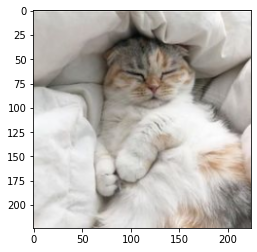

In [ ]:
test_img = x_test[35]
plt.imshow(test_img)

In [ ]:
test_vgg = tf.keras.applications.resnet_v2.preprocess_input(np.array([test_img]))

In [ ]:
pred = model.predict(test_vgg)

1/1 [==============================] - 1s 1s/step


In [ ]:
list(label_class.keys())[np.argmax(pred)]

'scottish_fold'

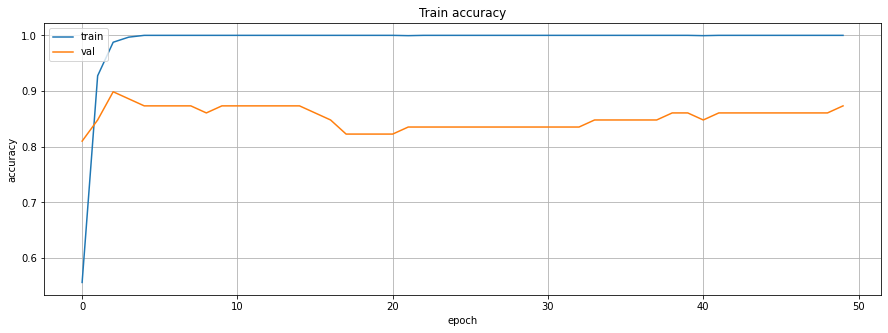

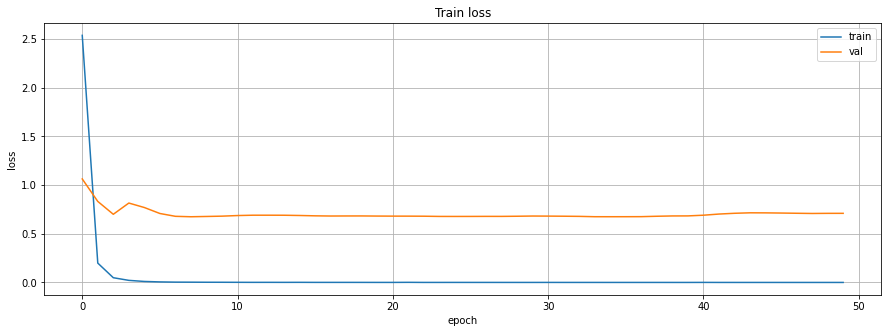

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
# Test using the model on x_test[i]

X_val_res = tf.keras.applications.resnet_v2.preprocess_input(np.array(x_val))
y_pred = model.predict( X_val_res )   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

3/3 [==============================] - 2s 392ms/step


## validate score

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(y_val,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      0.84      0.89        19
           2       0.95      1.00      0.97        19
           3       0.89      0.94      0.92        18

    accuracy                           0.95        76
   macro avg       0.95      0.95      0.95        76
weighted avg       0.95      0.95      0.95        76



## train score

In [ ]:
# Test using the model on x_test[i]

y_pred = model.predict( x_train_res )   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

59/59 [==============================] - 6s 96ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(aug_y_train,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       492
           1       1.00      0.97      0.98       468
           2       0.97      1.00      0.99       456
           3       0.99      0.99      0.99       444

    accuracy                           0.99      1860
   macro avg       0.99      0.99      0.99      1860
weighted avg       0.99      0.99      0.99      1860



## Test scrore

In [ ]:
# Test using the model on x_test[i]

y_pred = model.predict( x_test_res )   # reshape x_test[i] from (n_feature,) to (1, n_feature)
round_pred = [np.argmax(i) for i in y_pred]

3/3 [==============================] - 1s 457ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
from sklearn import metrics

print(classification_report(y_test,round_pred))

# fpr, tpr, thresholds = metrics.roc_curve(y_test, round_pred)
# print('AUC score',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       1.00      0.75      0.86        20
           2       0.95      1.00      0.97        19
           3       0.76      1.00      0.86        19

    accuracy                           0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.92      0.90      0.90        79



# Compare

In [ ]:
label_class = {'exotic_shorthair':0,'scottish_fold':1 ,'american_shorthair':2,'british_shorthair':3}

In [ ]:
new_img = []

In [ ]:
for i in range(4):
  for index,j in enumerate(y_train):
    if j == [i]:
      new_img.append(x_train[index])
      break

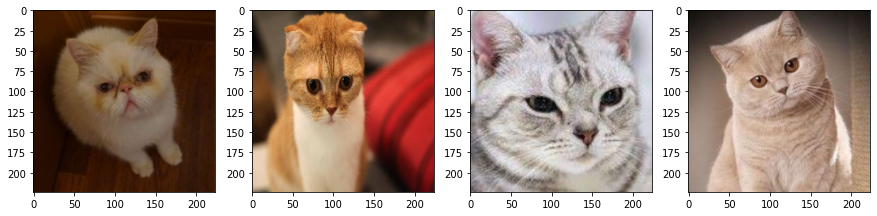

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(4):
  ax = plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(new_img[i])

In [ ]:
pre_img = tf.keras.applications.resnet_v2.preprocess_input(np.array(new_img))

In [ ]:
original_model = tf.keras.applications.resnet_v2.ResNet50V2(weights = "imagenet")

In [ ]:
predictions = original_model.predict(pre_img) 

1/1 [==============================] - 1s 739ms/step


In [ ]:
predictions

array([[3.5306918e-10, 2.7414959e-09, 5.9764727e-10, ..., 9.7860353e-10,
        5.9395768e-09, 1.0147633e-08],
       [1.9753348e-07, 7.4882252e-07, 1.7970815e-07, ..., 8.0137363e-07,
        1.0111545e-05, 2.9834348e-05],
       [7.7177575e-08, 1.6831670e-07, 2.6623722e-08, ..., 8.6933603e-08,
        2.6345828e-07, 4.1448516e-07],
       [8.2379159e-08, 1.3485563e-07, 2.2088663e-08, ..., 1.5170679e-08,
        1.0046897e-06, 2.2952147e-05]], dtype=float32)

In [ ]:
from keras.applications.imagenet_utils import decode_predictions 
label = decode_predictions(predictions) 

In [ ]:
label

[[('n02123394', 'Persian_cat', 0.9999881),
  ('n02328150', 'Angora', 2.0491375e-06),
  ('n01608432', 'kite', 1.4818338e-06),
  ('n02123045', 'tabby', 1.3597448e-06),
  ('n02127052', 'lynx', 9.625222e-07)],
 [('n02123597', 'Siamese_cat', 0.6282723),
  ('n02124075', 'Egyptian_cat', 0.2097192),
  ('n02127052', 'lynx', 0.093211636),
  ('n02123159', 'tiger_cat', 0.039862983),
  ('n02123045', 'tabby', 0.016411962)],
 [('n02124075', 'Egyptian_cat', 0.81220865),
  ('n02123045', 'tabby', 0.1426721),
  ('n02123159', 'tiger_cat', 0.044391442),
  ('n02127052', 'lynx', 0.00040707405),
  ('n02123394', 'Persian_cat', 7.035813e-05)],
 [('n02123045', 'tabby', 0.3665323),
  ('n02124075', 'Egyptian_cat', 0.36224344),
  ('n02123159', 'tiger_cat', 0.24636887),
  ('n02123394', 'Persian_cat', 0.017090546),
  ('n02123597', 'Siamese_cat', 0.0032186748)]]

## original model

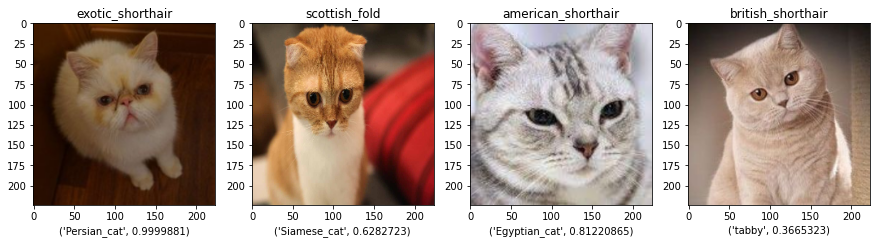

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(4):
  
  ax = plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(new_img[i])
  plt.title(list(label_class.keys())[i])
  plt.xlabel(label[i][0][1:])

## trained model

In [ ]:
pred = model.predict(pre_img)

1/1 [==============================] - 0s 23ms/step


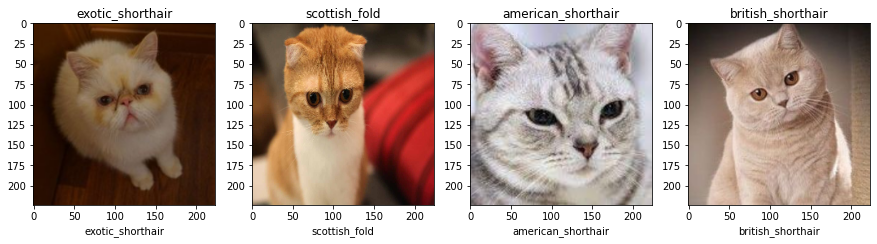

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(4):
  
  ax = plt.subplot(1, 4, i+1)
  plt.axis('off')
  plt.imshow(new_img[i])
  plt.title(list(label_class.keys())[i])
  plt.xlabel(list(label_class.keys())[np.argmax(pred[i])])